In [1]:
import tensorflow as tf

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)

In [4]:
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\laure\.keras\datasets\flower_photos


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3666

In [6]:
CLASS_NAMES = [item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]
print(CLASS_NAMES)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [7]:
import random
from basicCNN import *

IMG_SIZE = 50
training_data , testing_data,  distribution = create_training_data(data_dir, IMG_SIZE, CLASS_NAMES)
random.shuffle(training_data)


In [8]:
print(len(training_data))
i = 0
for elem in distribution:
    print('Proportion of ' + str(CLASS_NAMES[i]))
    print(elem / image_count)
    i+=1

2749
Proportion of daisy
0.1723949809056192
Proportion of dandelion
0.24440807419530824
Proportion of roses
0.1745771958537916
Proportion of sunflowers
0.190671031096563
Proportion of tulips
0.21794871794871795


This image


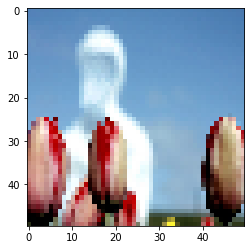

is represented like this to our code 
 
[[[183 129  81]
  [184 130  84]
  [183 132  82]
  ...
  [175 122  72]
  [174 121  74]
  [173 119  72]]

 [[184 130  84]
  [185 130  84]
  [185 131  85]
  ...
  [177 124  75]
  [176 122  75]
  [174 121  74]]

 [[186 133  83]
  [186 133  83]
  [186 133  83]
  ...
  [178 125  75]
  [178 124  74]
  [177 123  72]]

 ...

 [[  0   0   0]
  [  0   0   1]
  [  0   0   8]
  ...
  [  0   1   0]
  [138 130 105]
  [153 141 112]]

 [[  0   0   0]
  [  1   1   1]
  [  0   0   0]
  ...
  [ 62  82  69]
  [ 68  84  70]
  [ 78  89  71]]

 [[ 24  47  40]
  [  0   0   0]
  [  0   0   0]
  ...
  [ 25  55  47]
  [ 24  55  46]
  [ 27  55  46]]]


In [8]:
#split into data point and label (X,y)
X , y = restructure_data(training_data)

#take a look at a piece of data
print('This image')

check_image = training_data[0][0]
#try commenting out the line below
#how does it affect the image? how does it affect the training?
check_image = cv2.cvtColor(check_image, cv2.COLOR_BGR2RGB)
plt.imshow(check_image)
plt.show()

print('is represented like this to our code \n ')

print(training_data[0][0])
#print(testing_data[0][0])

In [10]:
X = X/255.0

#magical model building!
model = build_model(X,y,len(CLASS_NAMES))

#note: 
#epochs = number of times it trains
#validation_split = what to take out to test on automatically
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1924 samples, validate on 825 samples
Epoch 1/3
1924/1924 [==============================] - 40s 21ms/sample - loss: 1.5036 - acc: 0.3602 - val_loss: 1.2455 - val_acc: 0.4885
Epoch 2/3
1924/1924 [==============================] - 40s 21ms/sample - loss: 1.1506 - acc: 0.5187 - val_loss: 1.0612 - val_acc: 0.5636
Epoch 3/3
1924/1924 [==============================] - 40s 21ms/sample - loss: 0.9949 - acc: 0.6055 - val_loss: 1.0239 - val_acc: 0.5891


In [11]:
X_test, y_test = restructure_data(testing_data)
predictions = model.predict(X_test)

error_occurances = []
i = 0

while i < len(predictions):
    
    if not np.argmax(predictions[i]) == y_test[i]:
        error_occurances.append(i)
        
    i+=1
    
print('The model was right ' + str(100*(1-len(error_occurances)/len(predictions))) + '% of the time')
    

The model predicted that this image is a sunflowers


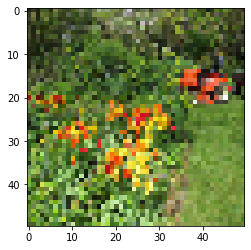

In [36]:
import random
#check a random data point from all of X_test
#check = random.randint(0,len(X_test)-1) 
#or check one of the mrked errors
check = error_occurances[random.randint(0, len(error_occurances)-1)]

print('The model predicted that this image is in the category of ' + DATA_CLASSES[np.argmax(predictions[check])])
fix_colors = cv2.cvtColor(X_test[check], cv2.COLOR_BGR2RGB)
plt.imshow(fix_colors)
plt.show()